<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Figure_3/Figure_3a/2_human_SARSCoV_validation_bulk_saliva_nasal_throat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Self-collected saliva, nasal swab, and throat samples from individuals enrolled in a COVID-19 household transmission study

Data source(s):  
https://journals.asm.org/doi/10.1128/spectrum.03873-22  
https://doi.org/10.1093/pnasnexus/pgad033  

In [1]:
!pip install -q anndata

import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import json
import os
import glob
import anndata
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%config InlineBackend.figure_format='retina'

def nd(arr):
    """
    Function to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00


# Generate count matrix
The raw sequencing data for this dataset is not availbale per participant privacy practices. The count matrices were generated using the following code:

In [2]:
# !pip install -q kb-python
# import kb_python.utils as kb_utils

# # Get PalmDB reference files
# virus_t2g = "LSCHWCP_2023/PalmDB/palmdb_clustered_t2g.txt"
# virus_fasta = "LSCHWCP_2023/PalmDB/palmdb_rdrp_seqs.fa"

# # Combine host genome and transcriptome for D-list
# host_cdna = "Homo_sapiens.GRCh38.cdna.all.fa.gz"
# host_dna = "Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz"
# host_cdna_dna = "Homo_sapiens.GRCh38.cdna_dna.fa.gz"
# !cat $host_cdna $host_dna > $host_cdna_dna

# # Path to raw data
# fastq_folder = "raw_data_folder"

# # Path to kallisto and bustools binaries
# kallisto = "kallisto/build/src/kallisto"
# bustools = "bustools/build/src/bustools"

# out_folder = f"{fastq_folder}/results_cdna_dna"

# # Generate virus reference index
# virus_index = "palmdb_human_dlist_cdna_dna.idx"
# !/usr/bin/time -v $kallisto index \
#     -t 12 \
#     --aa \
#     --d-list $host_cdna_dna \
#     -i $virus_index \
#     $virus_fasta

# fastqs = []
# for filename in glob.glob(f"{fastq_folder}/*.fastq.gz"):
#     fastqs.append(filename.split("/")[-1])
# fastqs.sort()

# for fastq in fastqs:
#     sample = fastq.split(".fastq.gz")[0]

#     !mkdir -p $out_folder/$sample

#     !$kallisto bus \
#             -i $virus_index \
#             -o $out_folder/$sample/ \
#             --aa \
#             -t 12 \
#             -x bulk \
#             $fastq_folder/$fastq \
#             &> $out_folder/$sample/kb_out.txt

#     !$bustools sort -o $out_folder/$sample/output_sorted.bus $out_folder/$sample/output.bus

#     !$bustools count \
#         --genecounts \
#         --cm \
#         -o $out_folder/$sample/bustools_count/ \
#         -g $virus_t2g \
#         -e $out_folder/$sample/matrix.ec \
#         -t $out_folder/$sample/transcripts.txt \
#         $out_folder/$sample/output_sorted.bus

# # Create AnnData object from generated count matrices
# adatas = []
# for fastq in fastqs:
#     # Load data
#     sample = fastq.split(".fastq.gz")[0]
#     results_dir = f"{fastq_folder}/results_cdna_dna/{sample}"

#     # Filepath to counts
#     X = f"{results_dir}/bustools_count/output.mtx"
#     # Filepath to barcode metadata
#     var_path = f"{results_dir}/bustools_count/output.genes.txt"
#     # Filepath to gene metadata
#     obs_path = f"{results_dir}/bustools_count/output.barcodes.txt"

#     # Create AnnData object
#     adata = kb_utils.import_matrix_as_anndata(X, obs_path, var_path)

#     # Add sample name
#     adata.obs["sample"] = sample

#     # Append to adata list
#     adatas.append(adata)

# # Concatenate adata objects
# adata = adatas[0]
# for adata_obj in adatas[1:]:
#     adata = adata.concatenate(adata_obj,
#                              join='outer',
#                              batch_key='sample_index',
#                              batch_categories=None,
#                              uns_merge=None,
#                              fill_value=np.nan)

# # Set sample as index and drop unnecessary columns
# adata.obs = adata.obs.set_index("sample")
# adata.obs = adata.obs.drop("sample_index", axis=1)

# # Clean up metadata labels
# clean_labels = []
# for label in adata.obs.index:
#     label1 = label.split("M006457-VSP-")[1].replace("CIT-", "").split("_S")[0]
#     label2 = label.split("_S")[1].split("_L001")[1].replace("R1_001", "R1").replace("R2_001", "R2")
#     clean_labels.append("".join([label1, label2]))

# adata.obs["clean_label"] = clean_labels

# adata.write(f"{fastq_folder}/results_cdna_dna/human_SARS-CoV_validation_bulk_saliva_nasal_throat.h5ad")

# Plot detection of SARS-CoV by kallisto translated search

Fetch generated count matrix:

In [3]:
!wget https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_3/Figure_3a/human_SARSCoV_validation_bulk_saliva_nasal_throat.h5ad
adata = anndata.read_h5ad("human_SARSCoV_validation_bulk_saliva_nasal_throat.h5ad")

--2025-02-15 20:55:09--  https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_3/Figure_3a/human_SARSCoV_validation_bulk_saliva_nasal_throat.h5ad
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_3/Figure_3a/human_SARSCoV_validation_bulk_saliva_nasal_throat.h5ad [following]
--2025-02-15 20:55:09--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_3/Figure_3a/human_SARSCoV_validation_bulk_saliva_nasal_throat.h5ad
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4165544 (4.0M) [application/octet-stream]
Saving

Load virus ID to sOTU mapping:

In [4]:
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/ID_to_taxonomy_mapping.csv
tax_df = pd.read_csv("ID_to_taxonomy_mapping.csv")

--2025-02-15 20:55:10--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/ID_to_taxonomy_mapping.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19705497 (19M) [text/plain]
Saving to: ‘ID_to_taxonomy_mapping.csv’

ID_to_taxonomy_mapp 100%[===================>]  18.79M   117MB/s    in 0.2s    

2025-02-15 20:55:11 (117 MB/s) - ‘ID_to_taxonomy_mapping.csv’ saved [19705497/19705497]



In [5]:
tax_df[tax_df["species"].str.contains("Severe acute respiratory syndrome")]

,ID,rep_ID,phylum,class,order,family,genus,species,strandedness
0,u1,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
1,u10066,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
2,u10121,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
3,u10124,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
4,u102609,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
...,...,...,...,...,...,...,...,...,...
404,u889,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
405,u9015,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
406,u944,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
407,u9771,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA


Load sample metadata:

In [6]:
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_3/Figure_3a/human_SARSCoV_validation_bulk_saliva_nasal_throat_metadata.csv
metadata = pd.read_csv("human_SARSCoV_validation_bulk_saliva_nasal_throat_metadata.csv")

--2025-02-15 20:55:12--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_3/Figure_3a/human_SARSCoV_validation_bulk_saliva_nasal_throat_metadata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1156 (1.1K) [text/plain]
Saving to: ‘human_SARSCoV_validation_bulk_saliva_nasal_throat_metadata.csv’

human_SARSCoV_valid 100%[===================>]   1.13K  --.-KB/s    in 0s      

2025-02-15 20:55:13 (47.3 MB/s) - ‘human_SARSCoV_validation_bulk_saliva_nasal_throat_metadata.csv’ saved [1156/1156]



In [7]:
# Convert replicates from string to list
metadata["replicate_clean"] = [json.loads(rep_list.replace("'", "\"")) for rep_list in metadata["replicate"].values]

metadata.head()

,replicate,qPCR_viral_load,sample_type,replicate_clean
0,"['3-Rep1_R1', '3-Rep1_R2', '3-Rep2_R1', '3-Rep...",2.530000e+05,Saliva,"[3-Rep1_R1, 3-Rep1_R2, 3-Rep2_R1, 3-Rep2_R2]"
1,"['9-Rep1_R1', '9-Rep1_R2', '9-Rep2_R1', '9-Rep...",5.230000e+06,Saliva,"[9-Rep1_R1, 9-Rep1_R2, 9-Rep2_R1, 9-Rep2_R2]"
2,"['12-Rep1_R1', '12-Rep1_R2', '12-Rep2_R1', '12...",1.100000e+10,Nasal swab,"[12-Rep1_R1, 12-Rep1_R2, 12-Rep2_R1, 12-Rep2_R2]"
3,"['15-Rep1_R1', '15-Rep1_R2', '15-Rep2_R1', '15...",4.640000e+06,Throat swab,"[15-Rep1_R1, 15-Rep1_R2, 15-Rep2_R1, 15-Rep2_R2]"
4,"['16-Rep1_R1', '16-Rep1_R2', '16-Rep2_R1', '16...",1.690000e+06,Throat swab,"[16-Rep1_R1, 16-Rep1_R2, 16-Rep2_R1, 16-Rep2_R2]"


In [8]:
# Indices used to give different sample types different colors/markers
c_indeces = [
    0,
    0,
    1,
    2,
    2,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    2,
]

Pearson's r computed on linear data: 0.90 (P value: 1.8477347842247234e-06)
Pearson's r computed on log transformed data: 0.96 (P value: 2.604447485105266e-09)


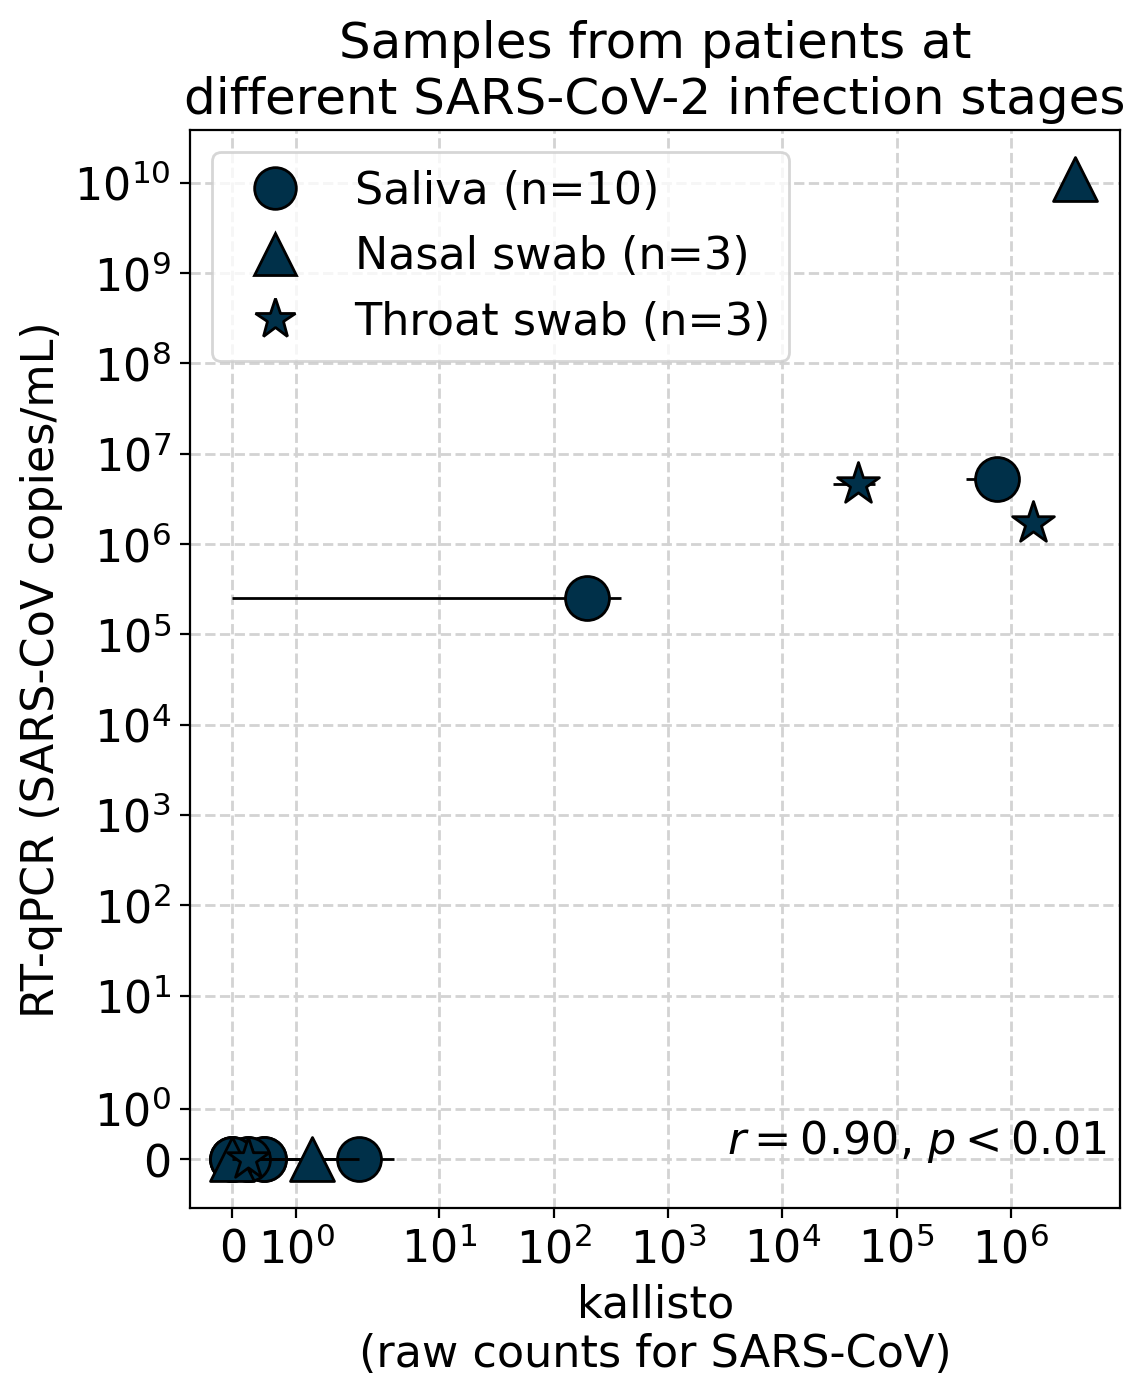

In [9]:
fig, ax = plt.subplots(figsize=(6, 7))
fontsize = 16

target_ids = tax_df[
    tax_df["species"].str.contains(
        "Severe acute respiratory syndrome-related coronavirus"
    )
]["rep_ID"].values

markers = ["o", "^", "*"]
fc = "#003049"
ec = "black"

rep_list = metadata["replicate_clean"].values
viral_load = metadata["qPCR_viral_load"].values

xs = []
ys = []
for i, reps in enumerate(rep_list):
    kb_counts = []
    for case in reps:
        kb_count = adata[adata.obs["clean_label"] == case, adata.var.index.isin(target_ids)].X
        kb_counts.append(kb_count.sum())

    xerr = [
        [np.mean(kb_counts) - np.min(kb_counts)],
        [np.max(kb_counts) - np.mean(kb_counts)],
    ]

    ax.errorbar(
        np.mean(kb_counts),
        viral_load[i],
        xerr=xerr,
        ls="none",
        color=ec,
        elinewidth=1,
        alpha=1,
    )

    ax.scatter(
        np.mean(kb_counts),
        viral_load[i],
        color=fc,
        edgecolors=ec,
        marker=markers[c_indeces[i]],
        zorder=2,
        s=250,
        alpha=1,
    )
    # Collect x and y values to compute Pearson r
    xs.append(np.mean(kb_counts))
    ys.append(viral_load[i])

# Add legend
legend_elements = [
    Line2D(
        [0],
        [0],
        marker=markers[0],
        color="none",
        label="Saliva (n=10)",
        markeredgecolor=ec,
        markerfacecolor=fc,
        markersize=15,
    ),
    Line2D(
        [0],
        [0],
        marker=markers[1],
        color="none",
        label="Nasal swab (n=3)",
        markeredgecolor=ec,
        markerfacecolor=fc,
        markersize=15,
    ),
    Line2D(
        [0],
        [0],
        marker=markers[2],
        color="none",
        label="Throat swab (n=3)",
        markeredgecolor=ec,
        markerfacecolor=fc,
        markersize=15,
    ),
]
ax.legend(handles=legend_elements, fontsize=fontsize)

ax.set_xscale("symlog")
ax.set_yscale("symlog")
ax.set_ylabel("RT-qPCR (SARS-CoV copies/mL)", fontsize=fontsize)
ax.set_xlabel(
    "kallisto\n(raw counts for SARS-CoV)",
    fontsize=fontsize,
)

# NEW Nat Biotech reviews: Add Pearson R
corr_coef, p_value = pearsonr(xs, ys)
if p_value < 0.01:
  ax.text(3300, 0.1, f"$r = {corr_coef:.2f}$, $p < 0.01$", fontsize=fontsize)
else:
  ax.text(3300, 0.1, f"$r = {corr_coef:.2f}$, $p = {p_value:.2f}$", fontsize=fontsize)

print(f"Pearson's r computed on linear data: {corr_coef:.2f} (P value: {p_value})")

# Also print Pearson R computed on log transformed data
corr_coef_log, p_value_log = pearsonr(np.log1p(np.array(xs)), np.log1p(np.array(ys)))
print(f"Pearson's r computed on log transformed data: {corr_coef_log:.2f} (P value: {p_value_log})")

# Add diagonal
# ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="black", ls="--", lw=1, zorder=1)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_title(
    f"Samples from patients at\ndifferent SARS-CoV-2 infection stages",
    fontsize=fontsize + 2,
)

# plt.tight_layout()

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)

plt.savefig("bulk_benchmark_alexVSP.png", dpi=300, bbox_inches="tight")

fig.show()